In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import os

In [20]:
train = pd.read_csv('../data/train.csv')#.drop(columns='Id')

In [21]:
train

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


In [22]:
for column in train.columns:
    print(column)
    print(train[column].value_counts())

Id
0007de18844b0dbbb5e1f607da0606e0    1
aa90aad818852ca47177213e5be26709    1
aa5d26353816ded3a8a6625aeeabe88b    1
aa635b767ed19b26ac40a8882f3331e8    1
aa6fae51f270df4093831d11d7dd61d2    1
                                   ..
554b19adc114ac107175c2115347136a    1
554bda115618f06c0cccc09c9ec549c3    1
55521992ad6215df8b423a767cc7a3c6    1
555b694f51ae06552493692a94cf9167    1
fff8e47c766799c9e12f3cb3d66ad228    1
Name: Id, Length: 9912, dtype: int64
Subject Focus
0    9638
1     274
Name: Subject Focus, dtype: int64
Eyes
1    7658
0    2254
Name: Eyes, dtype: int64
Face
1    8960
0     952
Name: Face, dtype: int64
Near
1    8540
0    1372
Name: Near, dtype: int64
Action
0    9813
1      99
Name: Action, dtype: int64
Accessory
0    9240
1     672
Name: Accessory, dtype: int64
Group
0    8630
1    1282
Name: Group, dtype: int64
Collage
0    9420
1     492
Name: Collage, dtype: int64
Human
0    8264
1    1648
Name: Human, dtype: int64
Occlusion
0    8207
1    1705
Name: Occlusion, dty

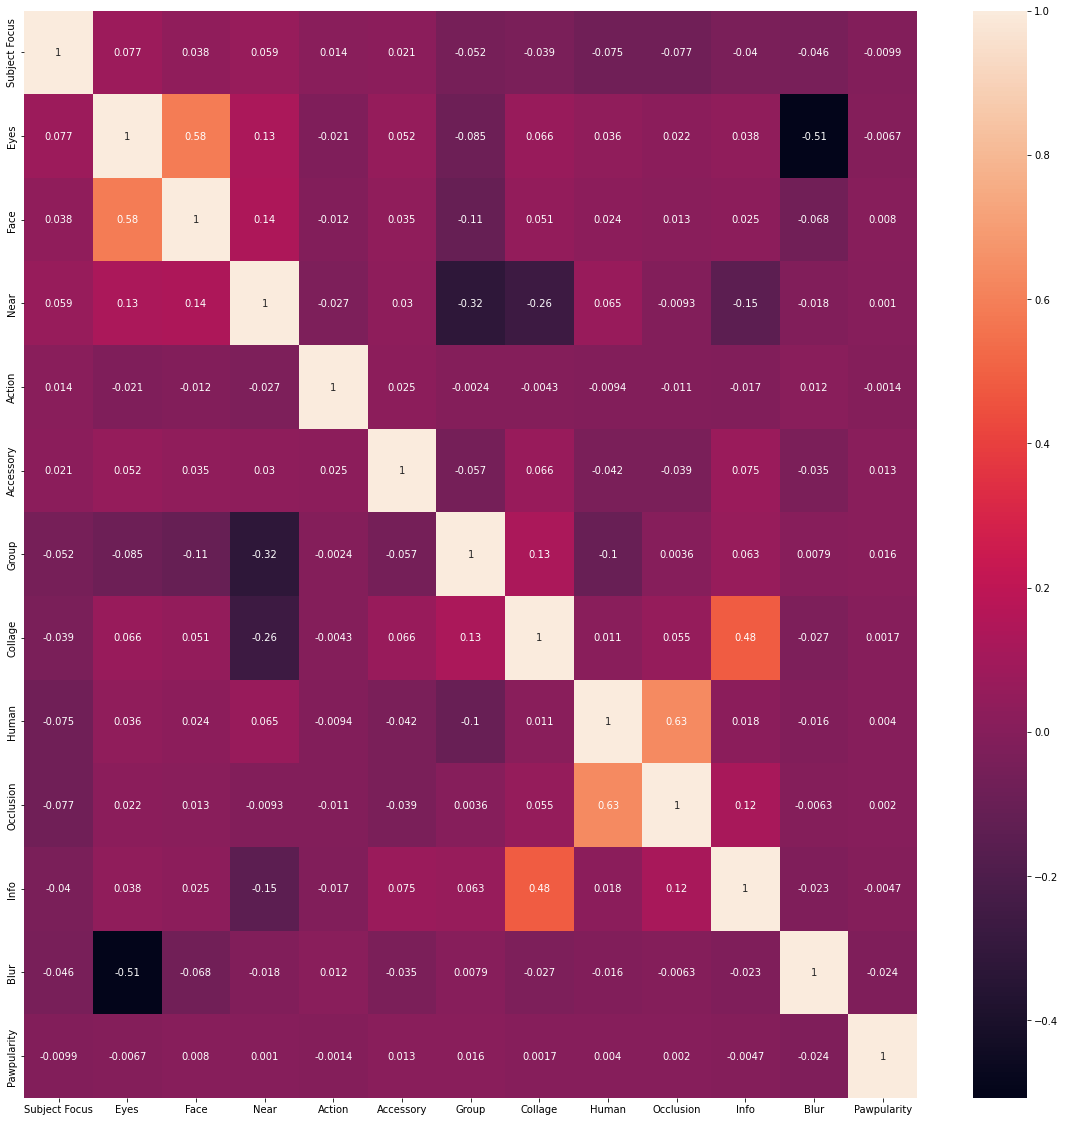

In [23]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 20))
corrMatrix = train.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

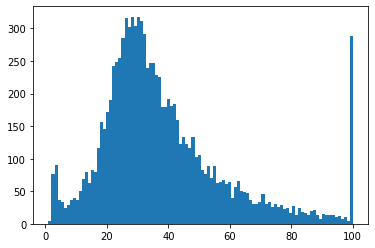

In [119]:
_ = plt.hist(train.Pawpularity, bins = train.Pawpularity.nunique())

In [26]:
train.Id

0       0007de18844b0dbbb5e1f607da0606e0
1       0009c66b9439883ba2750fb825e1d7db
2       0013fd999caf9a3efe1352ca1b0d937e
3       0018df346ac9c1d8413cfcc888ca8246
4       001dc955e10590d3ca4673f034feeef2
                      ...               
9907    ffbfa0383c34dc513c95560d6e1fdb57
9908    ffcc8532d76436fc79e50eb2e5238e45
9909    ffdf2e8673a1da6fb80342fa3b119a20
9910    fff19e2ce11718548fa1c5d039a5192a
9911    fff8e47c766799c9e12f3cb3d66ad228
Name: Id, Length: 9912, dtype: object

In [112]:
sample_size = 10
train_100 = train[train.Pawpularity == 100]
ids_great = train_100.sample(sample_size)
train_less_10 = train[train.Pawpularity < 10]
ids_bad = train_less_10.sample(sample_size)

def print_some_images(show_scores = False):
    for i in range(len(ids_bad)):
        f, axarr = plt.subplots(1, 2)

        good_image = mpimg.imread(f'../data/train/{ids_great.iloc[i]["Id"]}.jpg')
        bad_image = mpimg.imread(f'../data/train/{ids_bad.iloc[i]["Id"]}.jpg')
        images = [good_image, bad_image]
        scores = [ids_great.iloc[i]["Pawpularity"], ids_bad.iloc[i]["Pawpularity"]]
        image_score_list = [images, scores]
        idx = [0, 1]
        np.random.shuffle(idx)
        if show_scores:
            axarr[0].set_title(scores[idx[0]])
            axarr[1].set_title(scores[idx[1]])
        axarr[0].imshow(images[idx[0]])
        axarr[1].imshow(images[idx[1]])


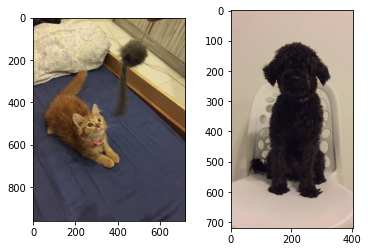

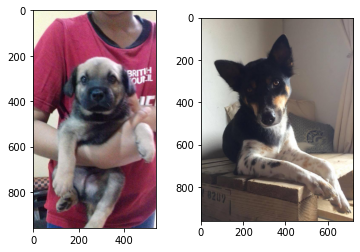

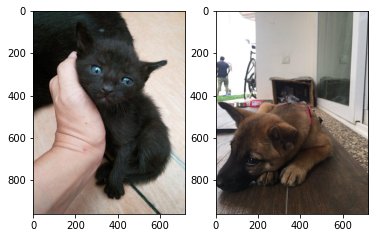

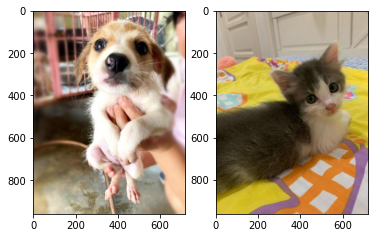

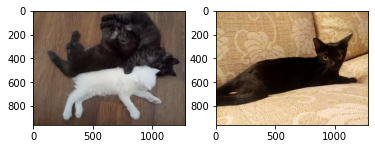

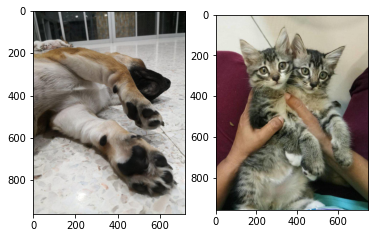

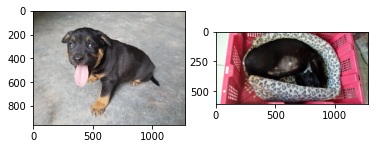

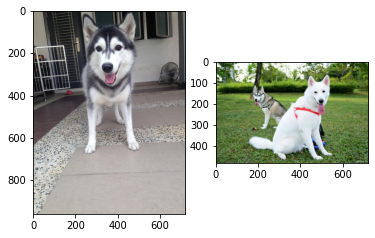

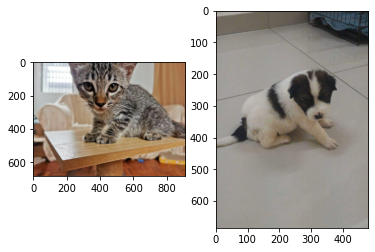

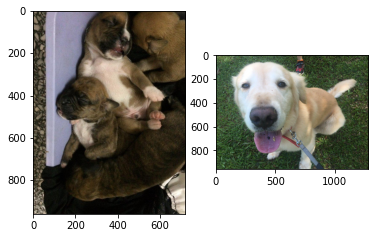

In [117]:
print_some_images()

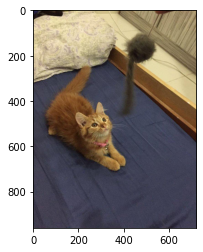

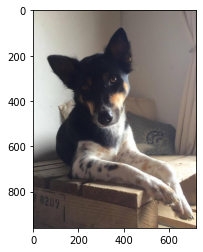

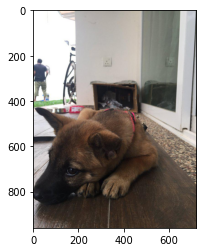

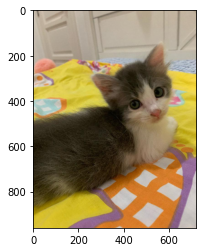

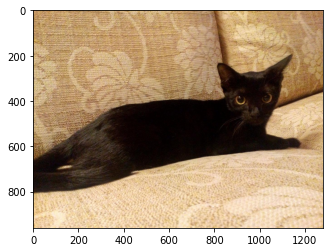

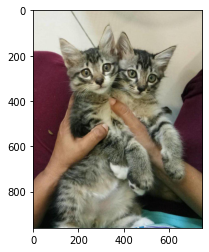

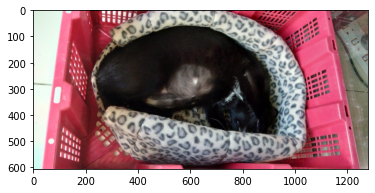

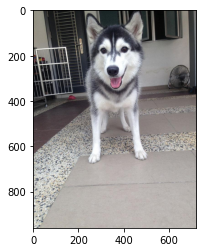

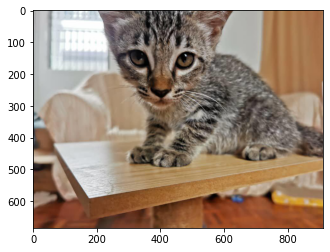

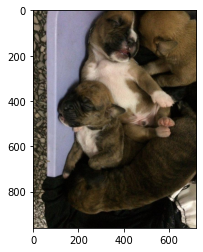

In [120]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for i in range(len(ids)):
    img = mpimg.imread(f'../data/train/{ids_bad.iloc[i]["Id"]}.jpg')
    imgplot = plt.imshow(img)
    plt.show()

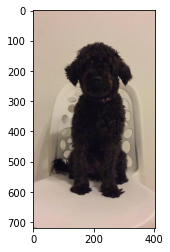

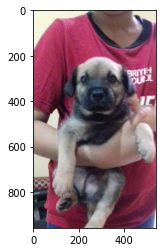

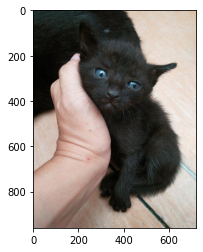

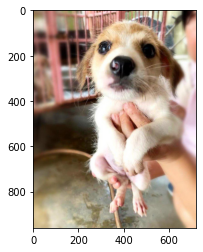

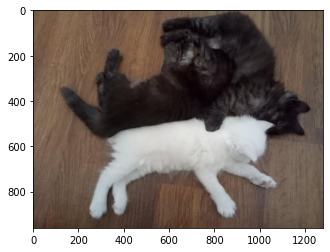

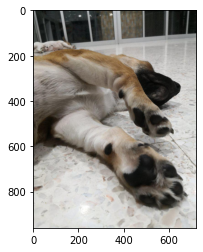

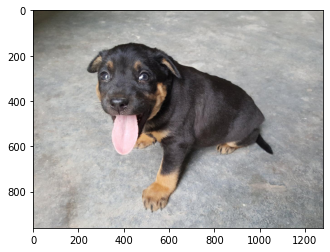

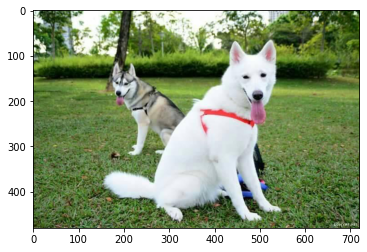

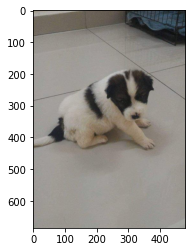

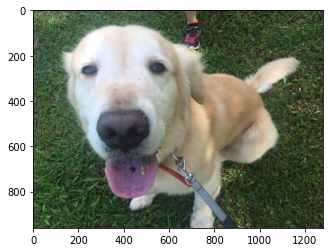

In [122]:
train_less_10 = train[train.Pawpularity < 10]

ids = train_less_10.sample(10)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for i in range(len(ids)):
    img = mpimg.imread(f'../data/train/{ids_great.iloc[i]["Id"]}.jpg')
    imgplot = plt.imshow(img)
    plt.show()